In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Import data from CSV
df = pd.read_csv(Path('resources/crypto_data.csv'))
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# OCD this column name
df.rename(columns={'Unnamed: 0':'CoinTicker'}, inplace=True)
df

,CoinTicker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
# Quick look at the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinTicker       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
# Checkfor currencies that are currently being traded
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# Discard all cryptocurrencies that are not being traded
df = df[df['IsTrading'] == True]
df

,CoinTicker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
# Drop the IsTrading column from the dataframe
df = df.drop(['IsTrading'], axis=1)
df

,CoinTicker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Check how many rows have null values
df.isnull().sum()

CoinTicker           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [9]:
# Remove all rows that have at least one null value
df.dropna(inplace=True)
df.isnull().sum()

CoinTicker         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [10]:
# Check what is left
df

,CoinTicker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Filter for cryptocurrencies that have been mined
df = df[df['TotalCoinsMined'] > 0]
df

,CoinTicker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Delete CoinTicker and CoinName from the dataframe
df = df.drop(['CoinTicker', 'CoinName'], axis=1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [13]:
# Double check which columns have objects
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [14]:
# Convert column TotalCoinSupply to floating integer values
df['TotalCoinSupply'] = df['TotalCoinSupply'].astype(float)
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [15]:
# Generate categorical variable lists
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_cat].nunique()

Algorithm    71
ProofType    25
dtype: int64

In [16]:
# Use get_dummies() to convert the remaining features with text values into numerical data
dummy_df = pd.get_dummies(df)
dummy_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Check unique columns
dummy_df.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [18]:
# Standardize the dataset
scaled_df = MinMaxScaler().fit_transform(dummy_df)
print(scaled_df[0:5])

[[0.00000000e+00 4.20000000e-11 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

In [19]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Perform dimensionality reduction with PCA
principal_components = pca.fit_transform(scaled_df)

print(f'Original Shape: {scaled_df.shape}')
print(f'Dimensionally Reduced Shape: {principal_components.shape}')
print(f'Explained Variance: {pca.explained_variance_.sum()}')
result = tuple(map(lambda i, j: i - j, scaled_df.shape, principal_components.shape))
(rows, features) = result
print(f'Features Removed: {features}')

Original Shape: (532, 98)
Dimensionally Reduced Shape: (532, 28)
Explained Variance: 1.372472635475051
Features Removed: 70


In [20]:
# Transform PCA data to a DataFrame
pca_df = pd.DataFrame(data=principal_components)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.818637,-0.679241,-0.029655,-0.026442,0.003961,-0.021317,0.036198,-0.036825,-0.008006,0.015627,...,-0.008140,4.366295e-07,-4.508183e-17,3.594382e-16,-0.001960,-0.006324,-0.020447,0.009576,-0.005601,-0.001513
1,0.818633,-0.679242,-0.029654,-0.026450,0.003934,-0.021243,0.036267,-0.036775,-0.008027,0.015620,...,-0.007403,-2.752993e-07,-6.996669e-17,3.463003e-16,-0.001764,-0.006128,-0.020635,0.009592,-0.005627,-0.001420
2,0.756313,0.226039,-0.357200,-0.305925,-0.409858,-0.196677,-0.363641,0.700611,-0.250646,-0.054169,...,0.174234,8.881527e-05,7.598518e-16,-3.427082e-15,0.047517,0.040196,-0.044609,0.003901,0.000682,0.024190
3,-0.706987,0.247124,-0.272629,-0.607865,0.634856,-0.011515,-0.018222,0.021506,-0.026898,-0.026525,...,-0.004238,2.117135e-06,4.040804e-17,-1.654422e-16,0.000396,-0.002214,0.019534,-0.000514,0.007319,-0.000053
4,-0.701023,0.138647,-0.207299,-0.102160,-0.229490,-0.009397,-0.166562,-0.098807,0.045642,-0.127762,...,-0.001528,-8.191028e-07,-5.313318e-17,1.639474e-16,0.000210,-0.003520,-0.009804,-0.011354,0.015906,0.000248


In [21]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=78)

# Reduce dimensions
tsne_features = tsne.fit_transform(principal_components)

# Check that dimensions have been reduced
tsne_features.shape

(532, 2)

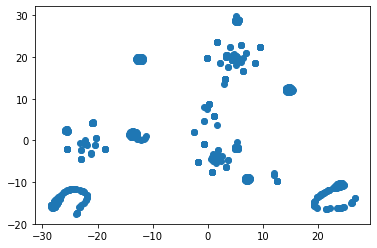

In [22]:
# Plot the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [23]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(principal_components)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,728.782969
1,2,536.097770
2,3,423.210023
3,4,368.288605
4,5,312.680101


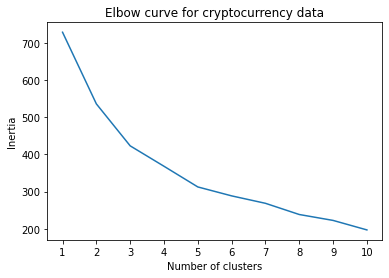

In [24]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryptocurrency data')
plt.show()

In [25]:
# Initializing model with K = 5
model = KMeans(n_clusters=5, random_state=5)

# Fitting model
model.fit(pca_df)

# Define labels for later
labels = model.labels_

In [26]:
# Get predictions
predictions = model.predict(pca_df)
print(predictions)

[0 0 3 1 1 4 3 1 1 1 2 1 3 2 4 3 1 4 0 0 1 4 1 4 4 0 1 1 4 0 4 0 4 1 4 3 1
 1 4 4 4 4 2 4 4 1 4 4 4 0 2 4 3 1 4 4 4 3 4 1 2 4 3 2 3 4 1 4 3 3 0 0 0 4
 4 4 2 3 1 2 1 2 3 1 1 1 1 0 0 4 4 1 4 3 2 1 3 0 1 1 1 2 4 3 3 4 2 4 3 4 2
 4 0 3 4 1 2 1 1 4 0 4 1 4 1 4 3 1 1 1 1 3 1 3 4 4 2 1 3 1 3 3 1 1 3 4 1 3
 3 4 3 1 3 0 2 1 1 4 1 3 2 3 4 2 4 1 3 3 3 3 3 4 2 0 0 0 2 1 2 1 3 0 1 3 1
 3 0 1 0 4 2 1 4 4 3 2 0 3 1 2 2 3 2 3 1 1 1 3 4 1 3 3 2 0 0 1 2 3 3 0 3 0
 0 3 1 0 2 0 0 2 3 4 1 1 0 3 3 0 1 0 1 2 4 4 2 1 1 0 4 1 2 1 3 3 3 4 2 3 1
 2 3 0 0 0 2 3 4 2 1 2 0 3 2 4 2 1 3 1 1 1 1 3 1 3 3 4 3 4 1 1 0 1 3 1 4 1
 2 1 3 1 3 2 1 4 2 4 4 4 4 4 0 0 1 2 2 3 1 3 1 0 1 2 1 0 3 3 3 1 0 3 4 2 0
 2 1 1 1 1 3 1 3 3 1 0 1 1 1 2 2 1 1 0 0 4 3 1 1 1 2 1 4 0 0 2 1 1 1 2 2 4
 1 1 0 1 4 1 1 2 1 1 4 4 1 3 1 3 3 2 2 1 1 4 1 3 0 0 1 2 1 2 2 0 1 1 3 2 1
 2 0 1 1 1 1 2 1 1 1 1 0 2 1 3 1 0 2 4 2 2 2 1 1 1 3 2 3 2 3 2 4 0 1 1 1 1
 2 3 2 2 1 3 2 1 0 1 1 1 1 2 1 1 1 2 1 3 1 1 2 1 4 0 1 3 1 2 0 1 2 0 3 3 3
 1 1 1 3 1 0 4 3 1 0 1 0 

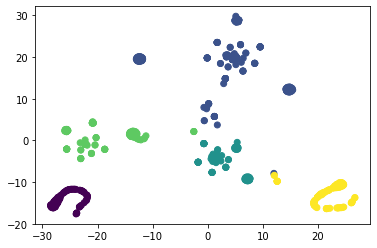

In [27]:
# Plot t-SNE features with labels to better visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

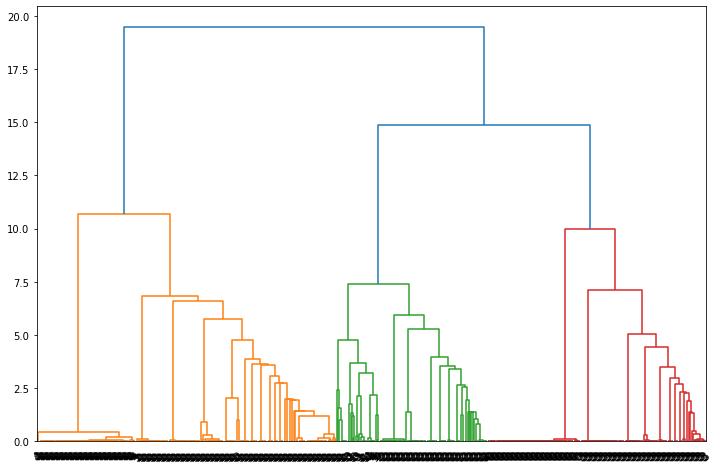

In [28]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

# Perform hierarchical clustering using the Ward method
mergings = linkage(pca_df, method='ward')

# Create a dendrogram of the results
plt.figure(figsize=(12,8))
dendrogram(mergings,
          labels=np.array(labels),
          leaf_rotation=45,
          leaf_font_size=12)
plt.show()

### Findings:

* I know the rubric expects us to use StandardScaler, but it produced weak results making me question if there was any viable data here. Switching to MinMaxScaler was an improvement.

* Inertia begins to slow down when K is at ~5.

* Ploting the t-SNE features with labels I observed 5 clusters in the data.

* Taking it one step further, performing a hierarchical clustering with a dendrogram plot, I observed 3 main clusters in the data.